In [225]:
import pandas as pd
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
import matplotlib.pyplot as plt
import statsmodels.api as sm
from matplotlib import pyplot
 

In [226]:

# df = pd.read_csv('VCB Historical Data.csv')
# df = pd.read_csv('ACB Historical Data.csv')
df = pd.read_csv('MBB Historical Data.csv')
df

,Date,Price,Open,High,Low,Vol.,Change %
0,12/22/2023,18300.0,"18,150.00","18,450.00","18,100.00",8.55M,0.83%
1,12/21/2023,18150.0,"18,100.00","18,150.00","18,000.00",3.98M,0.00%
2,12/20/2023,18150.0,"18,150.00","18,200.00","18,050.00",3.09M,0.00%
3,12/19/2023,18150.0,"18,000.00","18,200.00","17,950.00",5.90M,0.83%
4,12/18/2023,18000.0,"18,050.00","18,150.00","17,950.00",5.28M,-0.28%
...,...,...,...,...,...,...,...
1245,12/28/2018,9324.6,"9,540.30","9,540.30","9,324.60",10.96M,-1.27%
1246,12/27/2018,9444.5,"9,588.30","9,636.20","9,372.50",10.75M,0.51%
1247,12/26/2018,9396.5,"9,468.40","9,540.30","9,396.50",5.48M,-0.51%
1248,12/25/2018,9444.5,"9,516.40","9,636.20","9,276.70",20.83M,-3.67%


In [227]:
data = df['Price'][::-1];
val = data.reset_index(drop=True); 
val


0        9804.0
1        9444.5
2        9396.5
3        9444.5
4        9324.6
         ...   
1245    18000.0
1246    18150.0
1247    18150.0
1248    18150.0
1249    18300.0
Name: Price, Length: 1250, dtype: float64

In [228]:
# Create a date range starting from a specific date
start_date = '2018-12-22'
stop_date = '2023-12-22'
dates = pd.date_range(start=start_date, periods=len(val),freq='D')



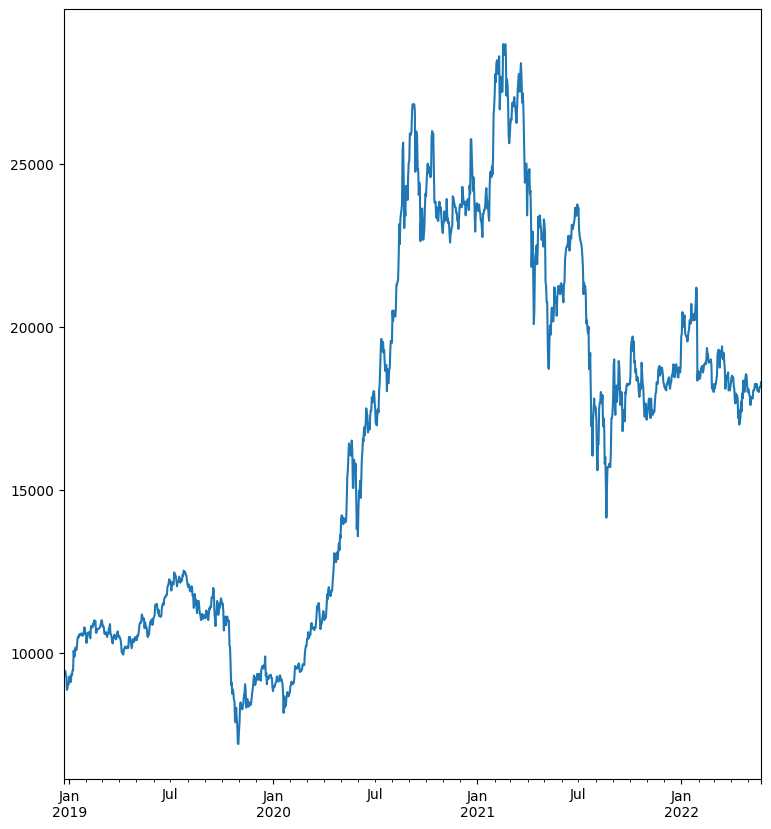

In [229]:
val.index = dates;
val.plot();

In [230]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])


In [231]:

adf_test(val.dropna());

1. ADF :  -1.4336192241076682
2. P-Value :  0.5660567865639915
3. Num Of Lags :  0


Vì P-value > 0.05, lớn hơn mức ý nghĩa, nên ta sẽ phải dùng phương pháp diff để biến chuỗi về chuỗi dừng.

In [232]:
adf_test(val.diff().dropna());

1. ADF :  -26.3625396328025
2. P-Value :  0.0
3. Num Of Lags :  1


Vì P-value < 0.05, nên giá trị của I = 1.

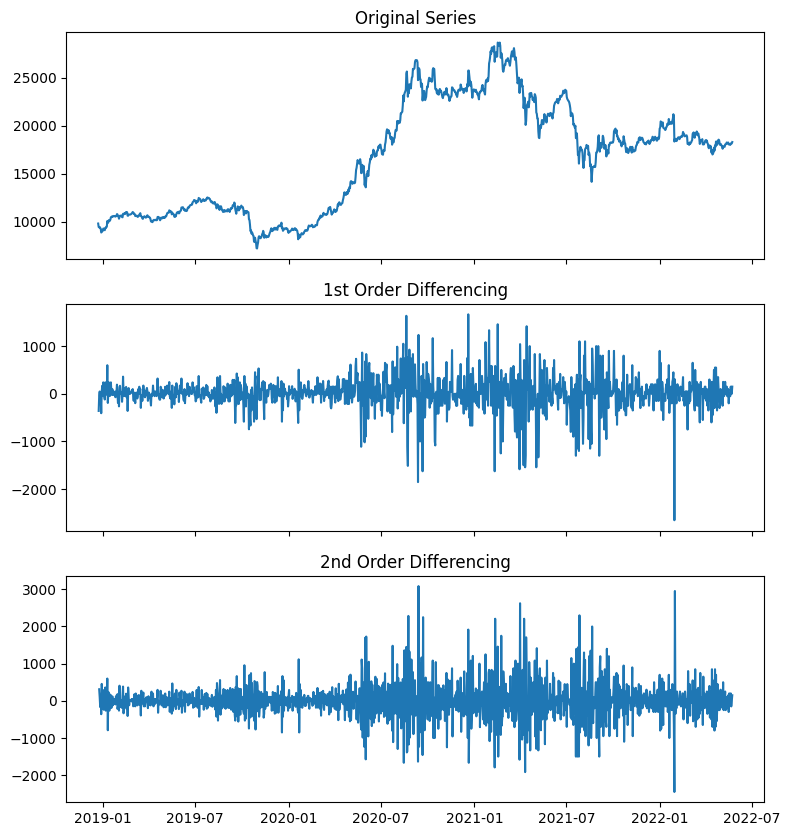

In [233]:
plt.rcParams.update({'figure.figsize':(9,10)})

# Original Series
fig, axes = plt.subplots(3, 1, sharex=True)
axes[0].plot(val); 
axes[0].set_title('Original Series')
# 1st Differencing
axes[1].plot(val.diff()); 
axes[1].set_title('1st Order Differencing')

# 2nd Differencing
axes[2].plot(val.diff().diff()); 
axes[2].set_title('2nd Order Differencing')
plt.show()

<Figure size 1000x1000 with 0 Axes>

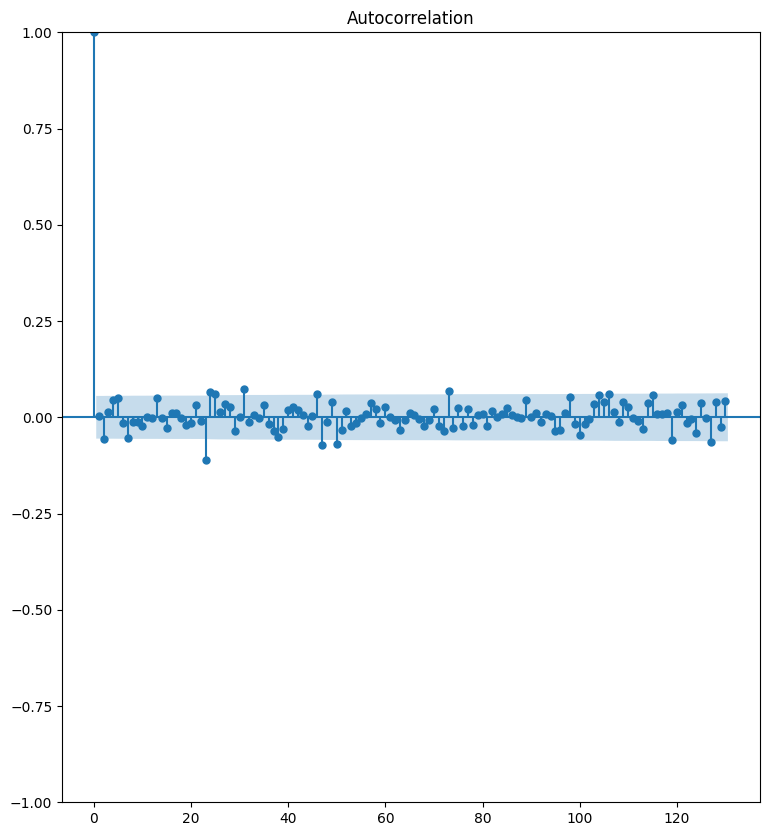

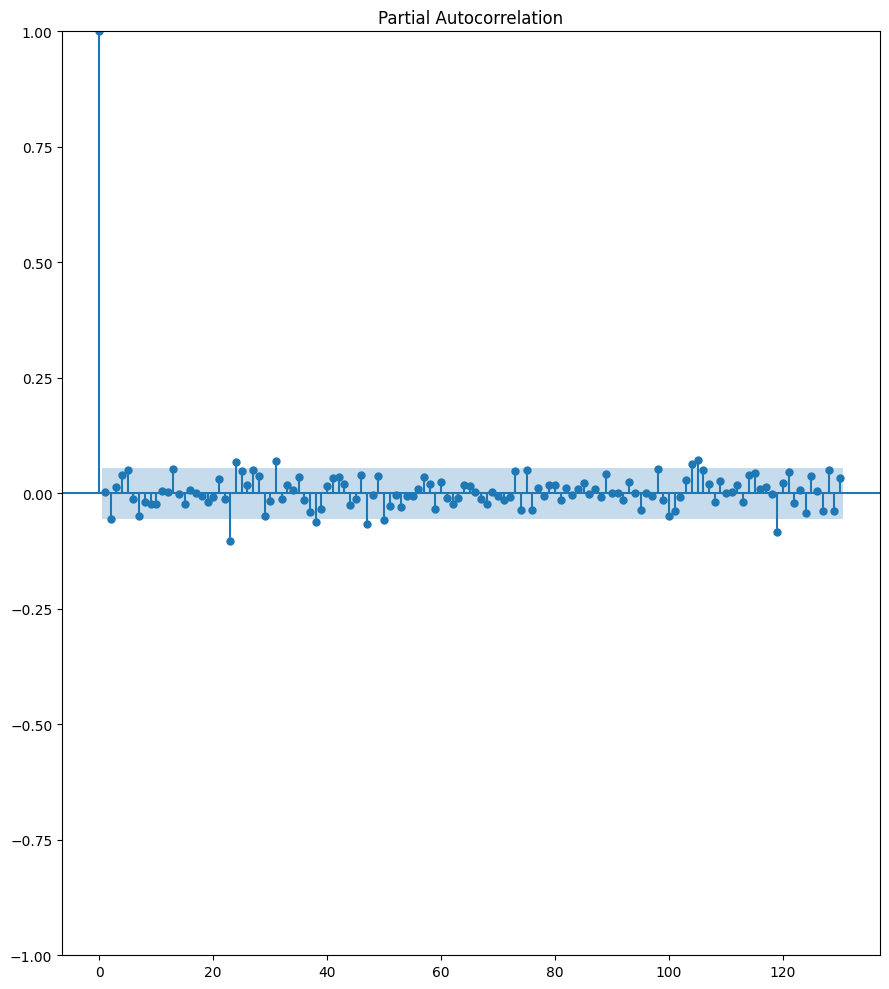

In [234]:
#Tính toán ACF và PACF 
plt.figure(figsize=[10, 10])

sm.graphics.tsa.plot_acf(val.diff().dropna(), lags=130)
plt.show();

sm.graphics.tsa.plot_pacf(val.diff().dropna(),lags=130);
plt.tight_layout();

plt.show();


In [235]:
# #Chia train test 9 - 1 
# print(val);
# train_size = int(0.9 * len(val))
# test_size = len(val) - train_size

# train_data = val[:train_size]
# test_data = val [train_size:]

In [236]:
# #Chia train val test 8-2
# print(val);
# train_size = int(0.8 * len(val))
# test_size = len(val) - train_size

# train_data = val[:train_size]
# test_data = val [train_size:]

In [237]:
#Chia train val test 7-3
print(val);
train_size = int(0.7 * len(val))
test_size = len(val) - train_size

train_data = val[:train_size]
test_data = val [train_size:]

2018-12-22     9804.0
2018-12-23     9444.5
2018-12-24     9396.5
2018-12-25     9444.5
2018-12-26     9324.6
               ...   
2022-05-20    18000.0
2022-05-21    18150.0
2022-05-22    18150.0
2022-05-23    18150.0
2022-05-24    18300.0
Freq: D, Name: Price, Length: 1250, dtype: float64


In [238]:
# ARIMA Model
model = sm.tsa.arima.ARIMA(train_data, order=(3,1,2))

model_fit = model.fit();


In [239]:
y_pred_test = model_fit.forecast(steps=test_size);
#set index for y_pred_test after train_data
y_pred_test.index = test_data.index

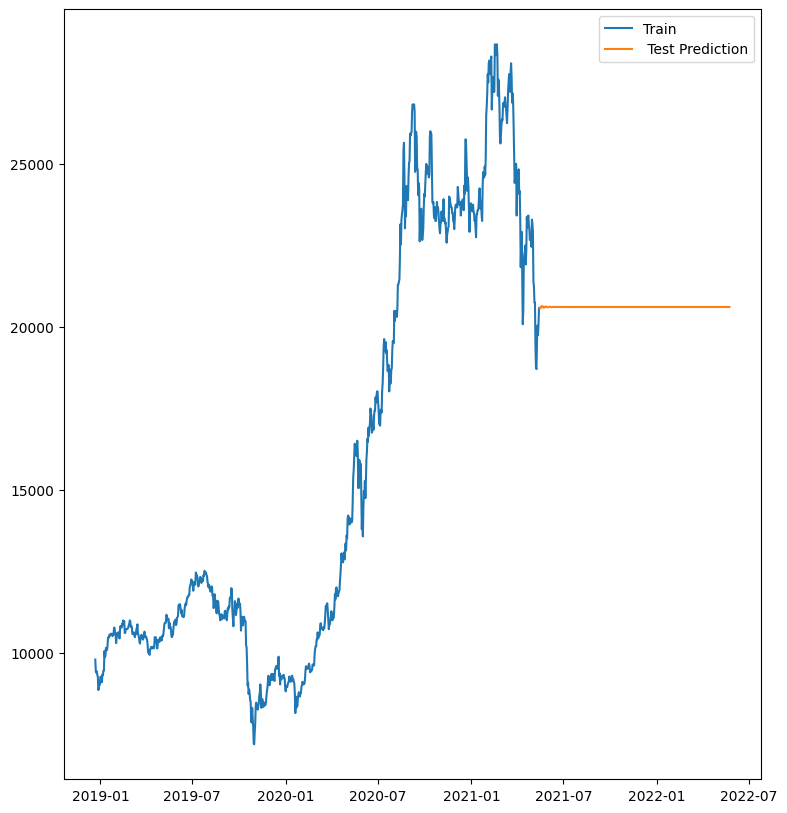

In [240]:
#plot train - val and y pred with label 
plt.plot(train_data, label='Train')
plt.plot(y_pred_test, label=' Test Prediction')
plt.legend();



<h2>Loss function</h2>

In [241]:

def forecast_accuracy(forecast, actual):
    mae = np.mean(np.abs(forecast - actual)) 
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    mape = np.mean(np.abs(forecast - actual) / np.abs(actual)) * 100  # MAPE: Đổi kết quả thành phần trăm
    # me = np.mean(forecast - actual)             # ME
     # MAE
    # mpe = np.mean((forecast - actual) / actual) * 100  # MPE: Đổi kết quả thành phần trăm
    
    # mse = np.mean((forecast - actual)**2)       # MSE
    # return {'mape': mape, 'me': me, 'mae': mae, 
    #         'mpe': mpe, 'rmse': rmse, 'mse': mse}

    return {'mae': mae, 'rmse': rmse, 'mape': mape}


In [242]:
forecast_accuracy(y_pred_test,test_data)

{'mae': 2181.342150151909,
 'rmse': 2425.0477130458453,
 'mape': 11.985171973276177}

In [243]:
#new model with train - val
# ARIMA Model
train_test_data = val[:int(0.9*len(val))]
model1 = sm.tsa.arima.ARIMA(train_test_data, order=(3,1,2))
model_fit1 = model1.fit();


In [244]:
y_pred_test = model_fit1.forecast(steps=test_size);
y_pred_test.index = test_data.index;

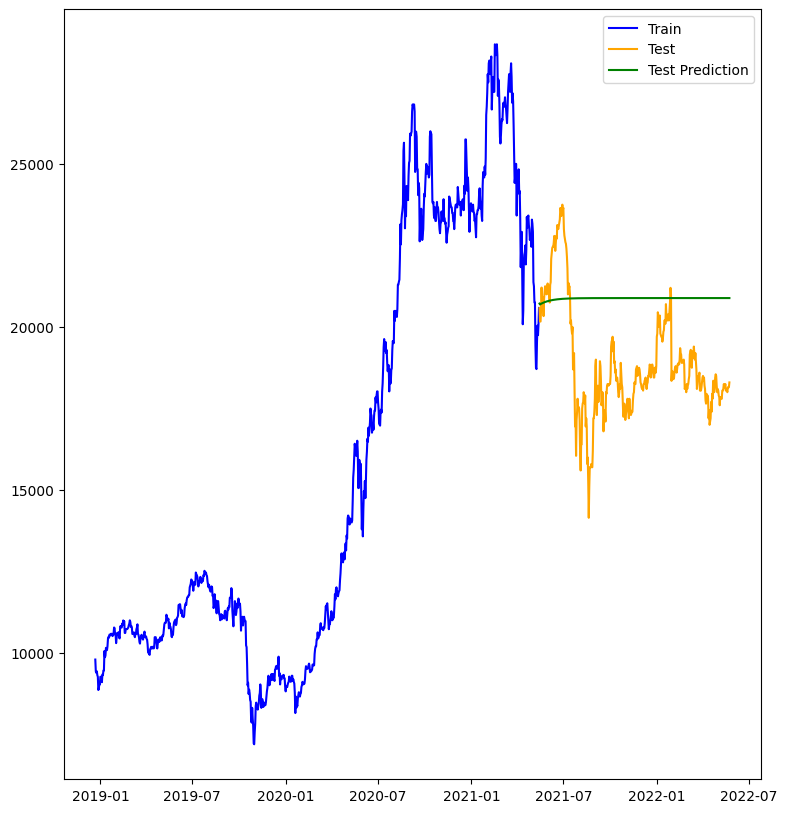

In [245]:
#plot train - test and y pred with label 

plt.plot(train_data, label='Train',color='blue')
plt.plot(test_data, label='Test', color='orange')
plt.plot(y_pred_test, label='Test Prediction', color='green')
plt.legend();


Calculate accuracy of test

In [246]:
forecast_accuracy(y_pred_test,test_data)

{'mae': 2375.529500069655,
 'rmse': 2627.8730219630665,
 'mape': 13.083629875426677}

Predict next 30 days

In [247]:
#Train all data to predict next 30 days.
model1 = sm.tsa.arima.ARIMA(val, order=(3,1,2))
model_fit_all = model1.fit();
y_pred_next_30 = model_fit_all.forecast(steps=30);


c:\Users\DUNG\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\DUNG\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


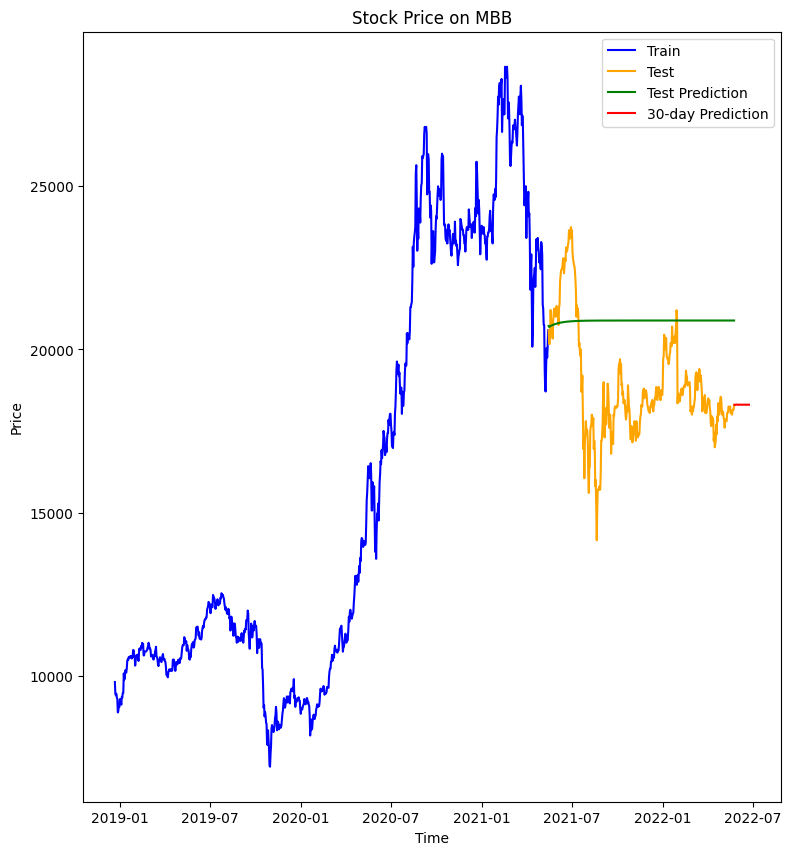

In [248]:
#plot train - test and y pred with label 


plt.plot(train_data, label='Train',color='blue')
plt.plot(test_data, label='Test', color='orange')
plt.plot(y_pred_test, label='Test Prediction', color='green')
plt.plot(y_pred_next_30, label= "30-day Predictions", color='red')

plt.legend(['Train', 'Test', 'Test Prediction', '30-day Prediction'])
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Stock Price on MBB')
plt.legend(['Train', 'Test', 'Test Prediction', '30-day Prediction'])
plt.show()